In [84]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
houses = pd.read_csv('data/home-data.csv')
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570



# Prediction using only one feature

## Split data

In [86]:
#Split data into train and test dataset
msk = np.random.rand(len(houses)) < 0.8
train = houses[msk]
test = houses[~msk]

train_features = np.array(train['sqft_living'].as_matrix())
train_targets = np.array(train['price'].as_matrix())

test_features = np.array(test['sqft_living'].as_matrix())
test_targets = np.array(test['price'].as_matrix())


## Plot data

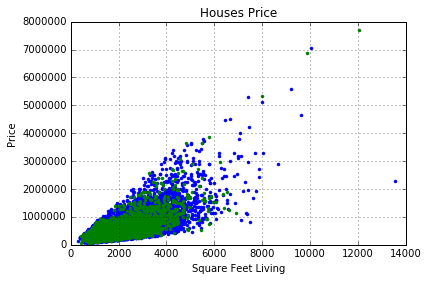

In [87]:
#Plot train and test data together
plt.plot(train_features, train_targets, "b." , test_features, test_targets, "g.")
plt.xlabel('Square Feet Living')
plt.ylabel('Price')
plt.title('Houses Price')
plt.grid(True)

## Fit the model

In [88]:

simple_regression = linear_model.LinearRegression()

reshaped_train_data = train_features.reshape(-1, 1) #Turning data into representation of skitlearn

simple_regression.fit(reshaped_train_data, train_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
# The coefficients
print('Coefficients: \n', simple_regression.coef_)
print('Intercept: ',simple_regression.intercept_)

Coefficients: 
 [ 278.60742564]
Intercept:  -39251.0361293


In [90]:
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((simple_regression.predict(test_features.reshape(-1,1)) - test_targets.reshape(-1,1)) ** 2))
print('Accuracy: ', simple_regression.score(test_features.reshape(-1,1), test_targets))

Residual sum of squares: 201406413463.79
Accuracy:  0.49946482891


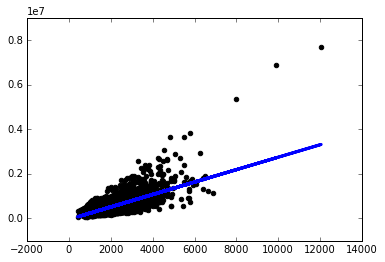

In [91]:
plt.scatter(test_features, test_targets, color='black')
plt.plot(test_features, simple_regression.predict(test_features.reshape(-1,1)), color='blue',
         linewidth=3)

# Prediction using more features

In [92]:
more_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
train[more_features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
4,3,2.00,1680,8080,1.0,98074
5,4,4.50,5420,101930,1.0,98053
6,3,2.25,1715,6819,2.0,98003
7,3,1.50,1060,9711,1.0,98198
9,3,2.50,1890,6560,2.0,98038
10,3,2.50,3560,9796,1.0,98007
11,2,1.00,1160,6000,1.0,98115


In [93]:
train_features = np.array(train[more_features].as_matrix())
train_targets = np.array(train['price'].as_matrix())

test_features = np.array(test[more_features].as_matrix())
test_targets = np.array(test['price'].as_matrix())

In [94]:
regression = linear_model.LinearRegression()
reshaped_train_data = train_features.reshape(-1, 6)

regression.fit(reshaped_train_data, train_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
# The coefficients
print('Coefficients: \n', regression.coef_)
print('Intercept: ',regression.intercept_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regression.predict(test_features.reshape(-1,6)) - test_targets) ** 2))
print('Accuracy: ', regression.score(test_features.reshape(-1,6), test_targets))

Coefficients: 
 [ -5.85091602e+04   1.02632475e+04   3.15502709e+02  -2.85924563e-01
  -3.49738267e+03   5.63834303e+02]
Intercept:  -55230791.3999
Residual sum of squares: 66046813779.00
Accuracy:  0.519590686558


# Examples

In [102]:
house1 = houses[houses['id'] == 5309101200]
print("One feature predict price U$%.2f" % simple_regression.predict(house1['sqft_living'].reshape(-1,1))[0])
print("More features redict price U$%.2f" % regression.predict(house1[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']])[0])
print("Real price U$%f" % house1['price'].values[0])

One feature predict price U$629406.79
More features redict price U$630425.30
Real price U$620000.000000


In [103]:
house2 = houses[houses['id']==1925069082]
print("One feature predict price U$%.2f" % simple_regression.predict(house2['sqft_living'].reshape(-1,1))[0])
print("More features redict price U$%.2f" % regression.predict(house2[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']])[0])
print("Real price U$%f" % house2['price'].values[0])

One feature predict price U$1253487.42
More features redict price U$1255809.14
Real price U$2200000.000000


In [112]:
house3 = houses[houses['price'] < 100000]
print("One feature predict price U$%.2f" % simple_regression.predict(house3['sqft_living'].reshape(-1,1))[0])
print("More features redict price U$%.2f" % regression.predict(house3[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']])[0])
print("Real price U$%f" % house3['price'].values[0])

One feature predict price U$80550.16
More features redict price U$112777.11
Real price U$80000.000000
